# Project 3
Team members: Paul, Renata and Hero

In this notebook we are training models to predict whether a food place will pass or fail an inspection. 

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

# Make sure to import other libraries that will be necessary for training models!

In [126]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv")

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014.csv")

In [3]:
#chicago_inspections_2011_to_2013.info(verbose = True)
#chicago_inspections_2014.info(verbose = True)

In [4]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [5]:
#number of unique establishments

len(chicago_inspections_2011_to_2013['DBA_Name'].unique())

9369

In [6]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [7]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [8]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True) 
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')

In [9]:
chicago_inspections_2011_to_2013.head()

,,Inspection_Date,Facility_Type,Risk,Inspection_Type,Results,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_DESCRIPTION,APPLICATION_TYPE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Inspection_MonthYear
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,2013-01-31,Grocery Store,Risk 3 (Low),Canvass,Pass,Other,0,0,2,0,0,0,0,2.0,1,44-33,19.0,Retail Food Establishment,RENEW,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,2013-01
507211,PANERA BREAD,2011-10-18,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,3,0,0,0,0,2.0,1,50-23,24.0,Retail Food Establishment,RENEW,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,2011-10
507212,LITTLE QUIAPO RESTAURANT,2011-10-18,Restaurant,Risk 1 (High),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.0,1,50-25,17.0,Retail Food Establishment,RENEW,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,2011-10
507216,SERGIO'S TAQUERIA PIZZA INC.,2011-10-19,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,6,0,0,0,0,2.0,1,39-48,17.0,Retail Food Establishment,RENEW,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,2011-10
507219,TARGET STORE # T-2079,2011-10-20,Restaurant,Risk 2 (Medium),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.0,1,40-18,24.0,Retail Food Establishment,RENEW,2006-07-07,2018-02-15,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,2011-10


## Visualization

What do inspections look like over time?

<AxesSubplot:title={'center':'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

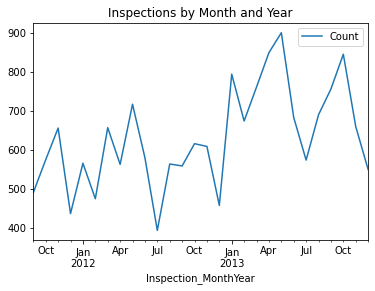

In [10]:
# Visualize Inspections Over Time
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

What do the results look like? 

We see that we have a highly imbalanced data set, with the majority of casses being "pass". As we are combining pass and pass w/ conditions, the majority class gets even bigger. We will need to address this imbalance when training and choosing a model. 

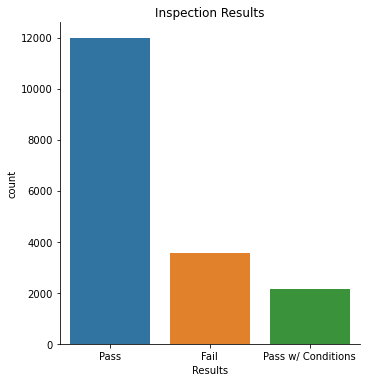

In [11]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

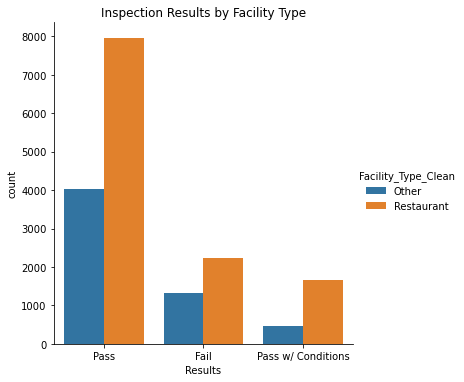

In [12]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## Preprocess Data

In [13]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [14]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

In [15]:
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

C:\Users\heroa\anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\heroa\anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


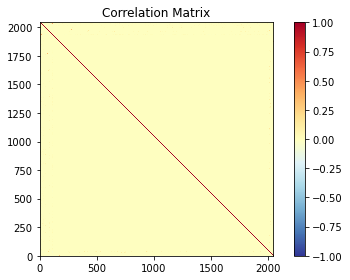

In [16]:
import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg

corr_matrix = np.corrcoef(X.T)
smg.plot_corr(corr_matrix)
plt.show()

# looks like there might be a few dots of high correlations...


The plot above shows that there are a few features that are highly correlated with one another (shown by the almost invisible specs of red). Below we record the pairs of features that have correlation above 0.9 and drop one of them.   

In [17]:
# finding very highly correlated vars

for i in range(len(corr_matrix)):
    for j in range(i):
        if abs(corr_matrix[i,j]) > 0.9:
            print(X.columns[i], "and", X.columns[j])
            print(corr_matrix[i,j])
        

firstRecord and timeSinceLast
0.9042314533095998
Facility_Type_Clean_Other and Facility_Type_Restaurant
-1.0
Facility_Type_Clean_Restaurant and Facility_Type_Restaurant
1.0
Facility_Type_Clean_Restaurant and Facility_Type_Clean_Other
-1.0
WARD_PRECINCT_19-39 and Facility_Type_Private School
1.0
WARD_PRECINCT_29-36 and Facility_Type_CATERING/CAFE
1.0
WARD_PRECINCT_8-65 and Facility_Type_Shared Kitchen User (Long Term)
1.0
LICENSE_DESCRIPTION_Food - Shared Kitchen and Facility_Type_Shared Kitchen
1.0
LICENSE_DESCRIPTION_Mobile Food License and Facility_Type_Mobile Food Preparer
1.0
LICENSE_DESCRIPTION_Shared Kitchen User and Facility_Type_Shared Kitchen User (Long Term)
1.0
LICENSE_DESCRIPTION_Shared Kitchen User and WARD_PRECINCT_8-65
1.0
LICENSE_DESCRIPTION_Special Event Food and WARD_PRECINCT_43-25
0.9999999999999998
APPLICATION_TYPE_RENEW and APPLICATION_TYPE_ISSUE
-0.9838471057796982


Seems like we can safely drop: timeSinceLast, Facility_Type_Clean_Other, Facility_Type_Restaurant, WARD_PRECINCT_19-39, WARD_PRECINCT_29-36, WARD_PRECINCT_8-65, LICENSE_DESCRIPTION_Food - Shared Kitchen, LICENSE_DESCRIPTION_Mobile Food License, LICENSE_DESCRIPTION_Shared Kitchen User, WARD_PRECINCT_43-25, APPLICATION_TYPE_RENEW

In [18]:
X = X.drop(columns = ['timeSinceLast', 'Facility_Type_Clean_Other', 'Facility_Type_Restaurant', 
                      'WARD_PRECINCT_19-39', 'WARD_PRECINCT_29-36', 'WARD_PRECINCT_8-65', 
                      'LICENSE_DESCRIPTION_Food - Shared Kitchen', 'LICENSE_DESCRIPTION_Mobile Food License', 
                      'LICENSE_DESCRIPTION_Shared Kitchen User', 
                     'WARD_PRECINCT_43-25', 'APPLICATION_TYPE_RENEW'])

### Standardize Data
Before training the models, we standardize all our predictors. 

In [19]:
min_max_scaler = preprocessing.MinMaxScaler()

# normalizing features 
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns, index=X.index) 


In [20]:
#X.head()

## Fit Models

First, we initialize some lists to record our tuned hyperparameters and validation metrics for each model we run.

In [21]:
models = ['random forest', 'decision tree','lda', 'log', 'log - upsampled']
parameters = []
trained_models = []
accuracy = []
recall = []
precision = []
f1_score = []

For our models below, when we tune our hyperparameters, we select the best hyperparameters based on **mean test precision**. The precision of a model tells us of all the establishments we label as positive (predicted to fail the inspection), what fraction of them are actually positive (actually failed the inspection). We think this is a valuable metric for this setting because we have limited resources to recommend 1000 establishments for audit and we want the true positive rate to be high for our model. In this setting, recall is less important as we are not concerned with being exhaustive in our classification (ie. capturing every failed establishment) but instead concerned with being precise (ie. correcntly capturing the riskiest businesses).  

### Model 1 - Random Forest and Decision Tree Classifier
A decision tree makes predictions based on a series of if-then conditions. A pro of decision trees is that they are highly flexible and allow for non-linear modelling. A con of decision trees is that they suffer from overfit, in which they can preduce low bias results for the training data but high variance results in the test data. To reduce the variance, we can impliment pruning techniques, such as controlling the maximum depth of the tree or setting a threshold for the Gini index below which we no longer split the data. We can also use ensemble methods, such as random forests, to reduce variance across multiple sets of data. 

In the context of this problem, a not-too complex decision tree (ie. one that has been pruned), could provide good insight into the types of predictors that are important for whether or not an establisment passes an inspection. This is useful for a policy context where policy makers not only want to know *which* establishments should be failed, but also *why* they are being failed. 

As a trade off between complexity and interprability, we start by training a random forest using five crossfold validation. Once the hyperparameters are tuned, the best model is fit on all the data and we plot the top 10 predictors that are most important. We then train a decision tree on the most important predictors and again tune the hyperparameters. The resulting decision tree gives an interpratable model for policy makers while benefitting from the feature importance provided by the random forest. 

We upsample the minority class in this model estimation using the imblearn package, in a method called Synthetic Minority Oversampling Technique (SMOTE). Info from https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html

#### Random Forest

In [22]:
#upsampling using SMOTE

imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              RandomForestClassifier())

# grid of potnetial hyperparameters
param_grid = {'randomforestclassifier__criterion': ['gini', 'entropy'],
             'randomforestclassifier__max_depth': [1, 5, 10],
             'randomforestclassifier__min_impurity_decrease': [0.0001, 0.0005, 0.001],
             'randomforestclassifier__random_state': [10]}

rf_grid = GridSearchCV(imba_pipeline, param_grid, cv = 5, 
                       scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                       refit = 'precision', verbose = 10)

In [23]:
# fit on entire data 
rf_grid.fit(X, y.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:  8.5min remaining:   30.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  9.0min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=10)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': [1, 5, 10],
                         'randomforestclassifier__min_impurity_decrease': [0.0001,
                                                                           0.0005,
                                                                           0.001],
                         'randomforestclassifier__random_state': [10]},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'], verbose=10)

In [24]:
# report best parameters and metrics from the grid search
best_index = np.argmax(rf_grid.cv_results_['mean_test_precision'])

metrics = ["params", "mean_test_accuracy", "mean_test_precision", 
           "mean_test_recall", "mean_test_f1", "mean_fit_time"]

for i in metrics:
    print(i, ":", rf_grid.cv_results_[i][rf_grid.best_index_])

params : {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_impurity_decrease': 0.0001, 'randomforestclassifier__random_state': 10}
mean_test_accuracy : 0.9013767917068366
mean_test_precision : 0.7119935201884731
mean_test_recall : 0.8616958558218334
mean_test_f1 : 0.7790806561892987
mean_fit_time : 46.845342302322386


In [25]:
# record paramaters and metrics
parameters.append(rf_grid.cv_results_['params'][best_index])
trained_models.append(rf_grid.best_estimator_)
accuracy.append(rf_grid.cv_results_["mean_test_accuracy"][best_index])
precision.append(rf_grid.cv_results_["mean_test_precision"][best_index])
recall.append(rf_grid.cv_results_["mean_test_recall"][best_index])
f1_score.append(rf_grid.cv_results_["mean_test_f1"][best_index])

The plot below shows which features are actually important in our model. 

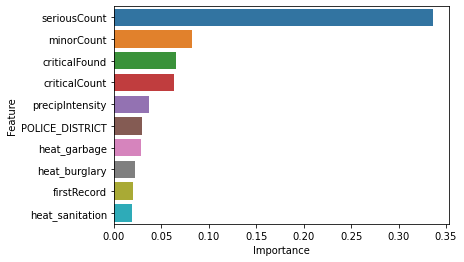

In [26]:
# Refit the random forest on the whole dataset to get feature importances using the tuned hyperparameters above
imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              RandomForestClassifier(criterion = 'gini', max_depth = 10, 
                                                     min_impurity_decrease = 0.0001, random_state = 10))

imba_pipeline.fit(X, y.ravel())
import seaborn as sns

feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(imba_pipeline.steps[1][1].feature_importances_)]
                             , axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(10, 'Importance'))
plt.show()

The plot above shows that the most important predictors are the number of violations recorded for an establishment. The number of **serious** violations is the most important determinant for whether or not a establishment passes the inspection. This makes intuitive sense, as you can imagine inspectors summing up the number of violations and putting more weight on them if they are serious (we assume that serious is more of a violation than critical or minor). Given that only a subset of features are important, we retrain a simplified decision tree by using the subset of important features and placing additional limits on the complexity of the tree. This gives us a far more interpretable model, which we can even plot to see the decision paths for failing or passing establishments. 

In [27]:
# save rf model
rf_tuned_pipe = imba_pipeline
rf_tuned_pipe

Pipeline(steps=[('smote', SMOTE(random_state=10)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10,
                                        min_impurity_decrease=0.0001,
                                        random_state=10))])

#### Decision Tree
In order to decide how many of the most important features to include in our decision tree, we tune a decision tree using a range of most important features and report the precision of each of the models.

In [28]:
imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              DecisionTreeClassifier())

param_grid = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
             'decisiontreeclassifier__max_depth': [1, 5, 10],
             'decisiontreeclassifier__min_impurity_decrease': [0.0001, 0.0005, 0.001],
             'decisiontreeclassifier__random_state': [10]}

dt_grid = GridSearchCV(imba_pipeline, param_grid, cv = 5, 
                       scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                       refit = 'precision', verbose = 10)

In [29]:
# loop over number of different features and save precision
precision = []
#accuracy = []
param_n = []

for n in [1, 5, 10, 50, 100, 200, 300, 400]:

    # create reduced data frame 
    important_features = feat_importances.nlargest(n, 'Importance')['Feature']
    # change this depending on how many predictors want to include

    X_reduced = X[X.columns[X.columns.isin(important_features)]]
    
    # fit on reduced data
    dt_grid.fit(X_reduced, y.ravel())
    
    # best fit for given n
    best_index = np.argmax(dt_grid.cv_results_['mean_test_precision'])
    
    # record the precision  
    precision.append(dt_grid.cv_results_["mean_test_precision"][best_index])
    
    # record the number of parameters
    param_n.append(n)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1267s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1167s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1815s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.8s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:   11.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   11.4s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:   21.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   22.6s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:   40.7s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   42.4s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:  1.0min remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.0min finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed: 21.9min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 22.0min finished


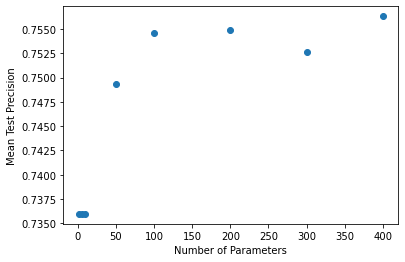

In [30]:
# plot n vs precision
plt.scatter(param_n, 
            precision)
plt.xlabel('Number of Parameters')
plt.ylabel('Mean Test Precision')
plt.show()

The plot above shows a variable relationship between number of predictors and mean test precision. Initially, increasing the number of important predictors increases the precision. This falls and rises again for 300 and 400 predictors respectively. Ideally, we would do a more fine grained search but this is costly time wise to run. As our aim is to produce a less complex model, we settle on the top 100 most important predictors to include in the decision tree, trained below.  

In [31]:
# create reduced data frame 
important_features = feat_importances.nlargest(100, 'Importance')['Feature']
# change this depending on how many predictors want to include

X_reduced = X[X.columns[X.columns.isin(important_features)]]

# fit on reduced data
dt_grid.fit(X_reduced, y.ravel())

# report best metrics
metrics = ["params", "mean_test_accuracy", "mean_test_precision", 
           "mean_test_recall", "mean_test_f1", "mean_fit_time"]

for i in metrics:
    print(i, ":", dt_grid.cv_results_[i][dt_grid.best_index_])


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:   31.7s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   33.7s finished


params : {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_impurity_decrease': 0.0001, 'decisiontreeclassifier__random_state': 10}
mean_test_accuracy : 0.922669978780041
mean_test_precision : 0.7546090790160037
mean_test_recall : 0.9144928220379432
mean_test_f1 : 0.826666449441606
mean_fit_time : 2.990515661239624


In [32]:
# record paramaters and metrics
parameters.append(dt_grid.cv_results_['params'][best_index])
trained_models.append(dt_grid.best_estimator_)
accuracy.append(dt_grid.cv_results_["mean_test_accuracy"][best_index])
precision.append(dt_grid.cv_results_["mean_test_precision"][best_index])
recall.append(dt_grid.cv_results_["mean_test_recall"][best_index])
f1_score.append(dt_grid.cv_results_["mean_test_f1"][best_index])

We plot the first 5 levels of the decision tree below to see on what predictors the splits are made. The first split is made on serious count, which is in line with the importance of this predictor shown above. 

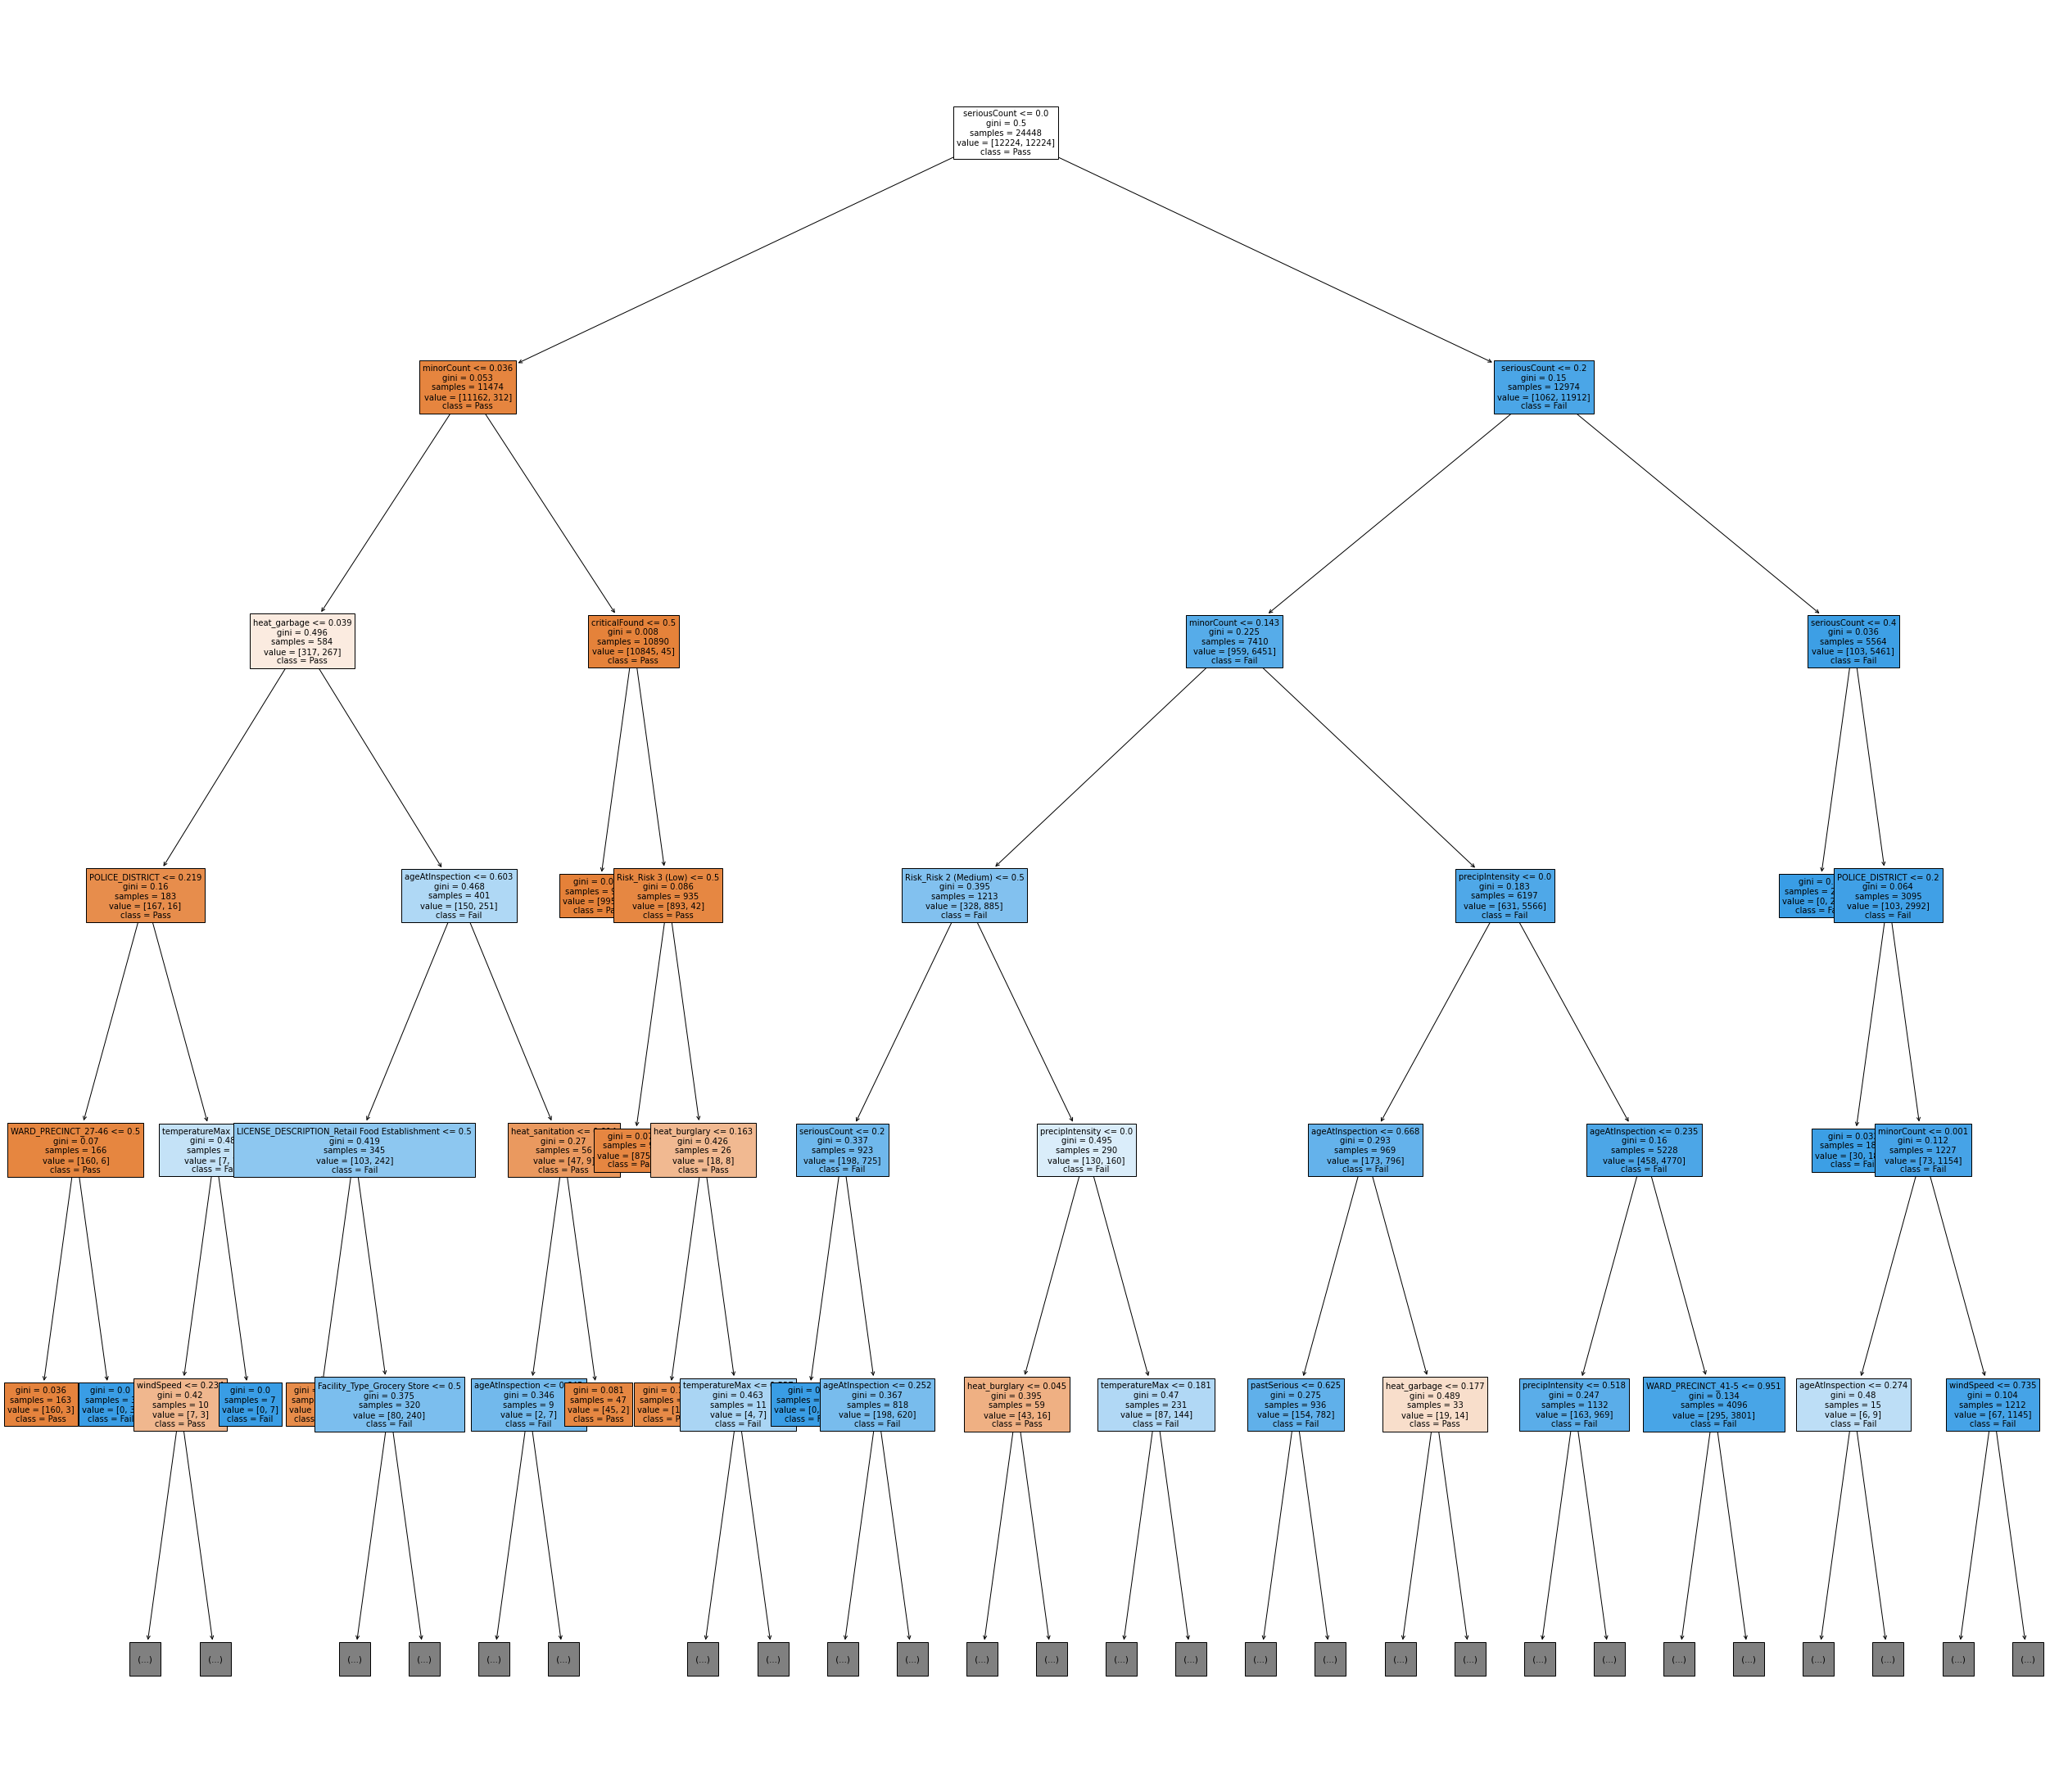

In [33]:
fig = plt.figure(figsize=(45,40))
_ = tree.plot_tree(dt_grid.best_estimator_[1], #steps[1][1], 
                   feature_names=X_reduced.columns,  
                   class_names=["Pass", "Fail"],
                   filled=True,
                  fontsize = 10,
                  max_depth = 5)

In [34]:
# refit the saved model with the tuned parameters
imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              DecisionTreeClassifier(criterion = 'gini', max_depth = 10, 
                                                     min_impurity_decrease = 0.0001, random_state = 10))

imba_pipeline.fit(X_reduced, y.ravel())

Pipeline(steps=[('smote', SMOTE(random_state=10)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=10,
                                        min_impurity_decrease=0.0001,
                                        random_state=10))])

In [35]:
dt_tuned_pipe = imba_pipeline

## Model 2 - LDA

Linear Discriminant Analysis, or LDA, is a way of approximating the distribution of the classes of Y using Bayes' Theorem. The LDA classifier estimates the prior probability of an observation belonging to the kth class using the proportion of the training observations. The LDA classifier also assumes that feature values are drawn from a multivariate Gaussian distribution (with class-specific means) and that all classes share a common covariance matrix. Using these estimates of the prior probability and covariance matrix, LDA uses Bayes' Rule to estimate the posterior probability of observation X<sub>i</sub> belonging to each class, assigning observation i to the class k with the highest posterior probability. 

One potential benefit of LDA, especially when the classes of Y are well separated, is that it estimates the Bayes decision boundary instead of modeling the conditional distribution of Y given X (as in logistic regression). This is also beneficial when the number of observations is relatively small. A drawback of estimating using Bayes' rule is that the LDA classifier attempts to minimize total error, regardless of whether it is type 1 or type 2. Because this dataset is class imbalanced, there is a risk that the LDA classifier will be much better at predicting the majority class (those establishments who pass) than what we are interested in, which is the minority class (those who fail). In this model, we play around with upsampling to see if having equal estimated prior probabilities in the training set (because of balanced classes) will allow the LDA classifier to perform better predictions. 

Lastly, LDA estimates a decision boundary through a linear combination of the features. In that sense, the weights of this linear combination are not easily interpretable in terms of directionality (e.g., it would not be clear how an increase or decrease in some feature influences the prediction). However, we can reasonably argue that those features whose weights are relatively large in absolute value are important to the analysis. 



In [36]:
clf = LinearDiscriminantAnalysis()

In [37]:
lda_model = clf.fit(X, y.ravel())

In [38]:
#first round, tuning solver and shrinkage (class imbalanced)

lda_reg = LinearDiscriminantAnalysis()

param_grid = {'solver': ['svd', 'lsqr', 'eigen'],
               'shrinkage': ['auto', None]}

lda_grid_reg = GridSearchCV(lda_reg, param_grid, cv=3, iid=False, 
                            scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                           refit = 'precision') 
lda_grid_reg.fit(X, y.ravel())

C:\Users\heroa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), iid=False, n_jobs=-1,
             param_grid={'shrinkage': ['auto', None],
                         'solver': ['svd', 'lsqr', 'eigen']},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [39]:
metrics = ["params", "mean_test_accuracy", "mean_test_precision", 
           "mean_test_recall", "mean_test_f1", "mean_fit_time"]

for i in metrics:
    print(i, ":", lda_grid_reg.cv_results_[i][lda_grid_reg.best_index_])
    

# precision seems decent! but recall is pretty low
# doesn't seem like the shrinkage parameter is useful, so will not tune it further
      

params : {'shrinkage': None, 'solver': 'lsqr'}
mean_test_accuracy : 0.8759072126728576
mean_test_precision : 0.794034802404138
mean_test_recall : 0.5393586005830904
mean_test_f1 : 0.625157401604057
mean_fit_time : 34.73793609937032


In [40]:
#generating tuned scores for non-upsampled dataset (class imbalanced)

lda_scores = cross_validate(lda_grid_reg.best_estimator_, X, y.ravel(),
                            scoring=['accuracy', 'precision', 'recall', 'f1'],
                         cv=5, n_jobs = -1)

In [41]:
for x in lda_scores.keys(): 
    print("Average", x, "is", lda_scores[x].mean())

# not sure why, but precision is MUCH lower than what was estimated in the grid search

Average fit_time is 36.25874977111816
Average score_time is 0.09335145950317383
Average test_accuracy is 0.7468396633893122
Average test_precision is 0.6157628497642198
Average test_recall is 0.7827351261191798
Average test_f1 is 0.6314989905010808


In [42]:
#upsampling using SMOTE
# from https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html

imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              LinearDiscriminantAnalysis())



In [43]:
#first round, tuning solver and shrinkage

from sklearn.model_selection import GridSearchCV

#lda_reg = LinearDiscriminantAnalysis()

param_grid = {'lineardiscriminantanalysis__solver': ['svd', 'lsqr', 'eigen'],
               'lineardiscriminantanalysis__shrinkage': ['auto', None]}

lda_grid_reg = GridSearchCV(imba_pipeline, param_grid, cv=3, iid=False, 
                            scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                           refit = 'precision') 
lda_grid_reg.fit(X, y.ravel())

C:\Users\heroa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=10)),
                                       ('lineardiscriminantanalysis',
                                        LinearDiscriminantAnalysis())]),
             iid=False, n_jobs=-1,
             param_grid={'lineardiscriminantanalysis__shrinkage': ['auto',
                                                                   None],
                         'lineardiscriminantanalysis__solver': ['svd', 'lsqr',
                                                                'eigen']},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [44]:
metrics = ["params", "mean_test_accuracy", "mean_test_precision", 
           "mean_test_recall", "mean_test_f1", "mean_fit_time"]

for i in metrics:
    print(i, ":", lda_grid_reg.cv_results_[i][lda_grid_reg.best_index_])
      


params : {'lineardiscriminantanalysis__shrinkage': 'auto', 'lineardiscriminantanalysis__solver': 'lsqr'}
mean_test_accuracy : 0.9084318882637316
mean_test_precision : 0.7359065804841479
mean_test_recall : 0.851635892452219
mean_test_f1 : 0.789464445603932
mean_fit_time : 134.07411003112793


In [45]:
# second round, tuning shrinkage parameter
# adding the shrinkage 

param_grid= {'lineardiscriminantanalysis__shrinkage' : np.arange(0.8, 1.0, 0.01)}



lda_grid_reg2 = GridSearchCV(lda_grid_reg.best_estimator_, param_grid, cv=3, iid=False, 
                            scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                           refit = 'precision') 

lda_grid_reg2.fit(X, y.ravel())

C:\Users\heroa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=10)),
                                       ('lineardiscriminantanalysis',
                                        LinearDiscriminantAnalysis(shrinkage='auto',
                                                                   solver='lsqr'))]),
             iid=False, n_jobs=-1,
             param_grid={'lineardiscriminantanalysis__shrinkage': array([0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ,
       0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

params : {'lineardiscriminantanalysis__shrinkage': 0.9200000000000002}
mean_test_accuracy : 0.9160730692765601
mean_test_precision : 0.7581371013877217
mean_test_recall : 0.8574667962423065
mean_test_f1 : 0.8044249874586771
mean_fit_time : 963.5321228504181


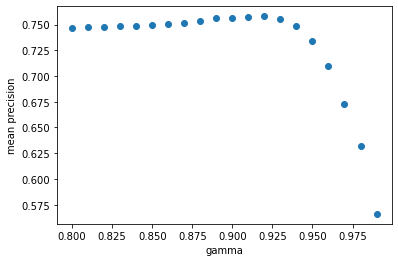

In [46]:
for i in metrics:
    print(i, ":", lda_grid_reg2.cv_results_[i][lda_grid_reg2.best_index_])
    

plt.scatter(lda_grid_reg2.cv_results_['param_lineardiscriminantanalysis__shrinkage'], 
            lda_grid_reg2.cv_results_["mean_test_precision"])
plt.xlabel('gamma')
plt.ylabel('mean precision')
plt.show()

In [47]:
lda_up_scores = cross_validate(lda_grid_reg2.best_estimator_, X, y, scoring=['precision', 'accuracy', 'recall', 'f1'],
                                  cv=5, n_jobs = -1)

In [49]:
print("Upsampled")
for i in lda_up_scores:
    print("Average", i, "is", lda_up_scores[i].mean())

Upsampled
Average fit_time is 90.52771611213684
Average score_time is 0.1397986888885498
Average test_precision is 0.7602932756398821
Average test_accuracy is 0.9203185318202358
Average test_recall is 0.8846947071380992
Average test_f1 is 0.8172923720655646


In [50]:
print("Imbalanced")
for x in lda_scores.keys(): 
    print("Average", x, "is", lda_scores[x].mean())

# looks like upsampled is the winner!

Imbalanced
Average fit_time is 36.25874977111816
Average score_time is 0.09335145950317383
Average test_accuracy is 0.7468396633893122
Average test_precision is 0.6157628497642198
Average test_recall is 0.7827351261191798
Average test_f1 is 0.6314989905010808


In [51]:
# record paramaters and metrics
parameters.append(lda_grid_reg2.cv_results_['params'][best_index])
trained_models.append(lda_grid_reg2.best_estimator_)
accuracy.append(lda_grid_reg2.cv_results_["mean_test_accuracy"][best_index])
precision.append(lda_grid_reg2.cv_results_["mean_test_precision"][best_index])
recall.append(lda_grid_reg2.cv_results_["mean_test_recall"][best_index])
f1_score.append(lda_grid_reg2.cv_results_["mean_test_f1"][best_index])

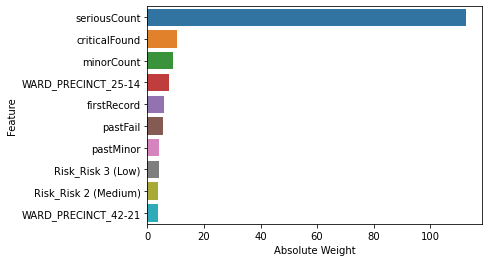

In [52]:
# looking at most influential variables

#lda_grid_reg2.best_estimator_.steps[1][1].coef_.ravel()


import seaborn as sns

lda_feat_importances = pd.concat([pd.DataFrame(X.columns), 
                                pd.DataFrame(abs(lda_grid_reg2.best_estimator_.steps[1][1].coef_.ravel()))],
                            axis = 1)
lda_feat_importances.columns = ["Feature", "Absolute Weight"]
sns.barplot(x = "Absolute Weight", y = "Feature", data = lda_feat_importances.nlargest(10, 'Absolute Weight'))
plt.show()

In [53]:
lda_tuned_pipe = lda_grid_reg2.best_estimator_

## Model 3 - Logistic Regression

Finally, we use logitsic regression to predict failure cases. Although it is refered to as a regression model, it is a classification technique because the outcome is binary. The following assumptions are necessary for logistic classification:

1. outcome is binary variable (1 or 0)

2. there is a linear relationship between the logit of the outcome and each predictor variable, ie logit(p) = log(p/(1-p))

3. no significant extremes in the continuous predictors

4. no high multicollinearity among predictors 

Logistic regression is well suited for policy predictions because it can produce *relatively* easy to interpret models that can be translated for policy makers.  

In [54]:
#make instance of model 
logisticRegr = LogisticRegression()

### No Upsampling

We first tune the model on our training data without upsampling from the minority class. 

In [55]:
#hyperparameter grid search, imbalanced
param_grid = {'penalty': ['l1', 'l2', 'none'],
              'fit_intercept' : [True, False], 
              'solver' : ['lbfgs', 'saga', 'newton-cg'],
             "max_iter": [1000], 
             'random_state' : [6]}

log_grid_reg = GridSearchCV(logisticRegr, param_grid, cv=3, iid=False, 
                            scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                           refit = 'precision') 
log_grid_reg.fit(X, y.ravel())

C:\Users\heroa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(), iid=False, n_jobs=-1,
             param_grid={'fit_intercept': [True, False], 'max_iter': [1000],
                         'penalty': ['l1', 'l2', 'none'], 'random_state': [6],
                         'solver': ['lbfgs', 'saga', 'newton-cg']},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [56]:
log_grid_reg.best_params_

{'fit_intercept': True,
 'max_iter': 1000,
 'penalty': 'l2',
 'random_state': 6,
 'solver': 'lbfgs'}

In [57]:
metrics = ["params", "mean_test_accuracy", "mean_test_precision", 
           "mean_test_recall", "mean_test_f1", "mean_fit_time"]

for i in metrics:
    print(i, ":", log_grid_reg.cv_results_[i][log_grid_reg.best_index_])

params : {'fit_intercept': True, 'max_iter': 1000, 'penalty': 'l2', 'random_state': 6, 'solver': 'lbfgs'}
mean_test_accuracy : 0.9084970813365875
mean_test_precision : 0.8043811125051809
mean_test_recall : 0.7223841917719468
mean_test_f1 : 0.7606975996437281
mean_fit_time : 8.511810700098673


After tuning the initial model, we take these hyperparameters and tune the parameter C. This is the regularization, which controls the trade off between the bias and the variance of our model. 

In [58]:
#tuning C, imbalanced
from sklearn.linear_model import LogisticRegression


param_grid = {'C' : np.arange(0.5, 1.5, 0.2)}

log_grid_reg2 = GridSearchCV(log_grid_reg.best_estimator_, param_grid, cv=3, iid=False, 
                            scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                           refit = 'f1') 
log_grid_reg2.fit(X, y.ravel())

C:\Users\heroa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=6),
             iid=False, n_jobs=-1,
             param_grid={'C': array([0.5, 0.7, 0.9, 1.1, 1.3])}, refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

The plot below shows that as C increases, at least initially, the mean test f1 increases. Here, we decided not to optimize on precision because the best paramaters produced a model with high precision but extremely low recall. To control the trade off between these, we optimized on the f1 score. The best C is around 1.3.  

params : {'C': 1.2999999999999998}
mean_test_accuracy : 0.9077132798929308
mean_test_precision : 0.8003371626490706
mean_test_recall : 0.7230320699708455
mean_test_f1 : 0.7593234344984009
mean_fit_time : 17.688121875127155


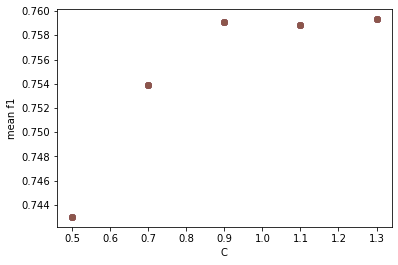

{'C': 1.2999999999999998, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 6, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [59]:
metrics = ["params", "mean_test_accuracy", "mean_test_precision", 
           "mean_test_recall", "mean_test_f1", "mean_fit_time"]

for i in metrics:
    print(i, ":", log_grid_reg2.cv_results_[i][log_grid_reg2.best_index_])

    plt.scatter(log_grid_reg2.cv_results_['param_C'], 
            log_grid_reg2.cv_results_["mean_test_f1"])
plt.xlabel('C')
plt.ylabel('mean f1')
plt.show()
    
print(log_grid_reg2.best_estimator_.get_params())

# i changed to f1 for this second round because tuning C pulls it to regularize too much... 
# precision goes up a lot but recall becomes abysmal

In [60]:
#adding my metrics to the empty lists
parameters.append(log_grid_reg2.cv_results_['params'][log_grid_reg2.best_index_])
trained_models.append(log_grid_reg2.best_estimator_)
accuracy.append(log_grid_reg2.cv_results_["mean_test_accuracy"][log_grid_reg2.best_index_])
precision.append(log_grid_reg2.cv_results_["mean_test_precision"][log_grid_reg2.best_index_])
recall.append(log_grid_reg2.cv_results_["mean_test_recall"][log_grid_reg2.best_index_])
f1_score.append(log_grid_reg2.cv_results_["mean_test_f1"][log_grid_reg2.best_index_])

Saving the tuned class imbalanced logistic regression.

In [61]:
best_imbalanced = LogisticRegression(fit_intercept = True, max_iter = 1000, 
                                     penalty = 'l2', random_state = 6, solver = 'lbfgs', C = 1.29)

In [62]:
best_imbalanced.fit(X, y.ravel())

LogisticRegression(C=1.29, max_iter=1000, random_state=6)

Below we plot the feature importance from the imbalanced tuned logistic regression. As with the other models, seriousCount is the most important feature. This is then followed by many of the location variables, which presumably indicate which ward the establishment is in.

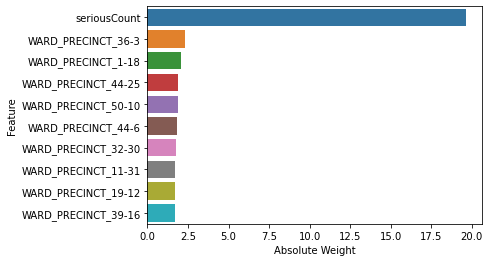

In [63]:
import seaborn as sns

log_feat_importances = pd.concat([pd.DataFrame(X.columns), 
                                pd.DataFrame(abs(best_imbalanced.coef_.ravel()))],
                            axis = 1)
log_feat_importances.columns = ["Feature", "Absolute Weight"]
sns.barplot(x = "Absolute Weight", y = "Feature", data = log_feat_importances.nlargest(10, 'Absolute Weight'))
plt.show()

We see below if the model can be improved by limiting to the 10 most important features. While the accuracy and the recall goes up, the precision goes down, so we do not use the reduce models. 

In [64]:
# top 10 important features 
importants_imbalanced = log_feat_importances.nlargest(10, 'Absolute Weight')['Feature']

In [65]:
# reduce
X_reduced_log = X[importants_imbalanced]

In [66]:
log_scores = cross_validate(best_imbalanced, X_reduced_log, y.ravel(), scoring=['precision', 'accuracy', 'recall', 'f1'],
                                  cv=5, n_jobs = -1)

In [67]:
# cross validated metrics for the reduced model

for x in log_scores.keys(): 
    print("Average", x, "is", log_scores[x].mean())

Average fit_time is 0.11934709548950195
Average score_time is 0.021072912216186523
Average test_precision is 0.7381770267331491
Average test_accuracy is 0.9225393238827643
Average test_recall is 0.9556256654760219
Average test_f1 is 0.8325873924866425


### Upsampling
We now train the model on upsampled data, to see if this provides a better fit. 

In [68]:
#hyperparameter grid search, balanced

#adding up sample here
imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              LogisticRegression())

param_grid = {'logisticregression__penalty': ['l1', 'l2'],
              'logisticregression__solver' : ['newton-cg', 'lbfgs', 'saga'],
             "logisticregression__max_iter": [1000]}

log_grid_reg3 = GridSearchCV(imba_pipeline, param_grid, cv=3, iid=False, 
                            scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                           refit = 'precision') 
log_grid_reg3.fit(X, y.ravel())

C:\Users\heroa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=10)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             iid=False, n_jobs=-1,
             param_grid={'logisticregression__max_iter': [1000],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'saga']},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [69]:
metrics = ["params", "mean_test_accuracy", "mean_test_precision", 
           "mean_test_recall", "mean_test_f1", "mean_fit_time"]

for i in metrics:
    print(i, ":", log_grid_reg3.cv_results_[i][log_grid_reg3.best_index_])

params : {'logisticregression__max_iter': 1000, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'}
mean_test_accuracy : 0.9212987151205542
mean_test_precision : 0.7420002072029916
mean_test_recall : 0.9345643019112407
mean_test_f1 : 0.8272128580543535
mean_fit_time : 82.76407837867737


In [70]:
#tuning C, balanced


param_grid = {'logisticregression__C' : np.arange(2, 2.1, 0.01), 
             'logisticregression__solver': ['newton-cg']}

log_grid_reg4 = GridSearchCV(log_grid_reg3.best_estimator_, param_grid, cv=3, iid=False, 
                            scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                           refit = 'precision') 
log_grid_reg4.fit(X, y.ravel())

best_grid = log_grid_reg4

C:\Users\heroa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


params : {'logisticregression__C': 2.049999999999999, 'logisticregression__solver': 'newton-cg'}
mean_test_accuracy : 0.9196658039782774
mean_test_precision : 0.746476975472901
mean_test_recall : 0.9109167476514415
mean_test_f1 : 0.8205306685056679
mean_fit_time : 120.64771525065105


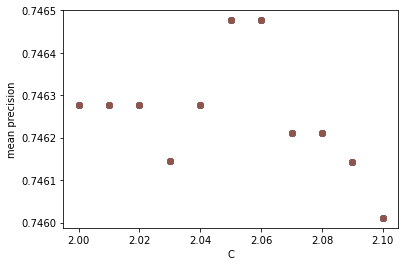

{'memory': None, 'steps': [('smote', SMOTE(random_state=10)), ('logisticregression', LogisticRegression(C=2.049999999999999, max_iter=1000, solver='newton-cg'))], 'verbose': False, 'smote': SMOTE(random_state=10), 'logisticregression': LogisticRegression(C=2.049999999999999, max_iter=1000, solver='newton-cg'), 'smote__k_neighbors': 5, 'smote__n_jobs': None, 'smote__random_state': 10, 'smote__sampling_strategy': 'auto', 'logisticregression__C': 2.049999999999999, 'logisticregression__class_weight': None, 'logisticregression__dual': False, 'logisticregression__fit_intercept': True, 'logisticregression__intercept_scaling': 1, 'logisticregression__l1_ratio': None, 'logisticregression__max_iter': 1000, 'logisticregression__multi_class': 'auto', 'logisticregression__n_jobs': None, 'logisticregression__penalty': 'l2', 'logisticregression__random_state': None, 'logisticregression__solver': 'newton-cg', 'logisticregression__tol': 0.0001, 'logisticregression__verbose': 0, 'logisticregression__wa

In [71]:
metrics = ["params", "mean_test_accuracy", "mean_test_precision", 
           "mean_test_recall", "mean_test_f1", "mean_fit_time"]

for i in metrics:
    print(i, ":", log_grid_reg4.cv_results_[i][log_grid_reg4.best_index_])

    plt.scatter(log_grid_reg4.cv_results_['param_logisticregression__C'], 
            log_grid_reg4.cv_results_["mean_test_precision"])
plt.xlabel('C')
plt.ylabel('mean precision')
plt.show()
    
print(log_grid_reg4.best_estimator_.get_params())

best = log_grid_reg4.best_estimator_

# i changed to f1 for this second round because tuning C pulls it to regularize too much... 
# precision goes up a lot but recall becomes abysmal

In [72]:
# hard coding to avoid running the hyperparameter grid searchers, 
# this is the same option as log_reg_grid4.best_estimator_
'''
imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              LogisticRegression(C=2.049999999999999, max_iter=1000, solver='newton-cg'))

best_params = { 
               'logisticregression': [LogisticRegression(C=2.049999999999999, max_iter=1000, solver='newton-cg')], 
               'smote__k_neighbors': [5], 'smote__n_jobs': [None], 'smote__random_state': [10], 
               'smote__sampling_strategy': ['auto'], 'logisticregression__C': [2.049999999999999], 
               'logisticregression__class_weight': [None], 'logisticregression__dual': [False], 
               'logisticregression__fit_intercept': [True], 'logisticregression__intercept_scaling': [1], 
               'logisticregression__l1_ratio': [None], 'logisticregression__max_iter': [1000], 
               'logisticregression__multi_class': ['auto'], 'logisticregression__n_jobs': [None], 
               'logisticregression__penalty': ['l2'], 'logisticregression__random_state': [None], 
               'logisticregression__solver': ['newton-cg'], 'logisticregression__tol': [0.0001], 
               'logisticregression__verbose': [0], 'logisticregression__warm_start': [False]}

best_grid = GridSearchCV(imba_pipeline, best_params, cv=3, iid=False, 
                            scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                           refit = 'precision') 
best_grid.fit(X, y.ravel())


best = best_grid.best_estimator_

'''


"\nimba_pipeline = make_pipeline(SMOTE(random_state=10), \n                              LogisticRegression(C=2.049999999999999, max_iter=1000, solver='newton-cg'))\n\nbest_params = { \n               'logisticregression': [LogisticRegression(C=2.049999999999999, max_iter=1000, solver='newton-cg')], \n               'smote__k_neighbors': [5], 'smote__n_jobs': [None], 'smote__random_state': [10], \n               'smote__sampling_strategy': ['auto'], 'logisticregression__C': [2.049999999999999], \n               'logisticregression__class_weight': [None], 'logisticregression__dual': [False], \n               'logisticregression__fit_intercept': [True], 'logisticregression__intercept_scaling': [1], \n               'logisticregression__l1_ratio': [None], 'logisticregression__max_iter': [1000], \n               'logisticregression__multi_class': ['auto'], 'logisticregression__n_jobs': [None], \n               'logisticregression__penalty': ['l2'], 'logisticregression__random_state': [None

As with the unbalanced logistic regression, the most important features for the balanced logistic regression are seriousCount and then dummies for the ward that the establishment is located in. 

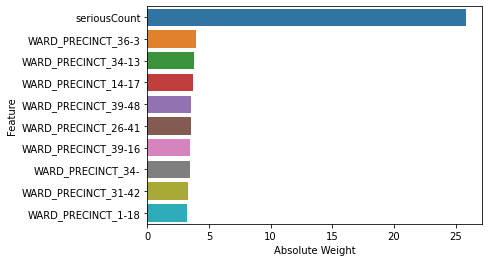

In [73]:
log_feat_importances = pd.concat([pd.DataFrame(X.columns), 
                                pd.DataFrame(abs(best.steps[1][1].coef_.ravel()))],
                            axis = 1)
log_feat_importances.columns = ["Feature", "Absolute Weight"]
sns.barplot(x = "Absolute Weight", y = "Feature", data = log_feat_importances.nlargest(10, 'Absolute Weight'))
plt.show()

# top 20 

importants = log_feat_importances.nlargest(20, 'Absolute Weight')['Feature']

We check is reducing to the top ten features would improve the model. It reduced precision so we do not use it. 

In [74]:
# reduce
X_reduced_log2 = X[importants]

In [75]:
# fit on reduced features

best.fit(X_reduced_log2, y.ravel())

Pipeline(steps=[('smote', SMOTE(random_state=10)),
                ('logisticregression',
                 LogisticRegression(C=2.049999999999999, max_iter=1000,
                                    solver='newton-cg'))])

In [76]:
log_up_scores = cross_validate(best, X_reduced_log2, y.ravel(), scoring=['precision', 'accuracy', 'recall', 'f1'],
                                  cv=5, n_jobs = -1)

In [77]:
for x in log_up_scores.keys(): 
    print("Average", x, "is", log_up_scores[x].mean())

Average fit_time is 0.7556617736816407
Average score_time is 0.022820806503295897
Average test_precision is 0.7347337013535611
Average test_accuracy is 0.9214943192734845
Average test_recall is 0.9569212128841402
Average test_f1 is 0.8309098976497994


In [78]:
#adding my metrics to the empty lists
parameters.append(log_grid_reg4.cv_results_['params'][best_index])
trained_models.append(log_grid_reg4.best_estimator_)
accuracy.append(log_grid_reg4.cv_results_["mean_test_accuracy"][best_index])
precision.append(log_grid_reg4.cv_results_["mean_test_precision"][best_index])
recall.append(log_grid_reg4.cv_results_["mean_test_recall"][best_index])
f1_score.append(log_grid_reg4.cv_results_["mean_test_f1"][best_index])

## Validation Metrics

For the models above, we have recorded various validation metrics as we go along. We gather those into a data frame and report them below.

In [79]:
data_tuples = list(zip(models, parameters, accuracy, precision, recall, f1_score, trained_models))
models_df = pd.DataFrame(data_tuples, columns=['Model', 'Parameters', "Accuracy", "Precision", "Recall", "F1 Score", "Trained_Model"])
models_df.head()

,Model,Parameters,Accuracy,Precision,Recall,F1 Score,Trained_Model
0,random forest,"{'randomforestclassifier__criterion': 'gini', ...",0.901377,0.735961,0.861696,0.779081,"(SMOTE(random_state=10), (DecisionTreeClassifi..."
1,decision tree,"{'decisiontreeclassifier__criterion': 'gini', ...",0.922670,0.735961,0.914493,0.826666,"(SMOTE(random_state=10), DecisionTreeClassifie..."
2,lda,{'lineardiscriminantanalysis__shrinkage': 0.86...,0.919143,0.735961,0.898283,0.817483,"(SMOTE(random_state=10), LinearDiscriminantAna..."
3,log,{'C': 1.2999999999999998},0.907713,0.749347,0.723032,0.759323,"LogisticRegression(C=1.2999999999999998, max_i..."
4,log - upsampled,"{'logisticregression__C': 2.0599999999999987, ...",0.919666,0.754609,0.910917,0.820531,"(SMOTE(random_state=10), LogisticRegression(C=..."


Our models all perform similarly based on precision, however the best model overall is the upsampled logistic regression. Not only does the model have high precision, it has high recall and subsequently a good F1 score. We select this for our policy simulation below. A further plus of this model is that we improved it's precision above by limiting to the 20 most important features. This is helpful for policy makers because they can related these 20 features to how and why an establishment might fail an inspection. 

## Policy Simulation

### Interpretable Machine Learning
Below we visualize the most important features from each of the models above. For all models, the most important is **seriousCount**. For the random forrest and decision tree, this is followed in importance by three other predictors also related to the number of violations an establishment has received. We used this knowledge to subset our predictors to the most important 100 features and trained a decision tree. Although we do not plot feature importance directly for the decision tree, we can see in first few levels of the tree that **seriousCount**, **criticalCount**, and **minorCount** are all important features for this classification - accounting for the first few split. This makes intuitive sense, as these features capture the number of violations establishments have recevied and should be highly correlated with whether or not an establishment fails their inspection. Although this is helpful for the auditors/city to know, it is less helpful for establishments themselves, because they presumably want to know what leads to them getting these violations in the first place. Given that the violation counts are likely proxies for other features that capture specific details of the establishments (eg. where the garbage is placed), we could remove them and see which other features subsequently become more important. This might make our models more useful for the establishment side. 

As well as some features indicating the conditions of the food establishments and their licensing, some location predictors also show up as important. The LDA feature importance plot below also shows that the location of the establishment plays a role in the prediction (indicated by WARD_PRECINCT). This is something we might be worried about for equitable policy. An algorithm that predicted failure based on the location of an establishment would likely reinforce existing discrimination based on neighborhoods.

The bar plot below for logistic regression shows the 20 features that we have selected for our best model. This includes etablishment characteristics such as their age, how they are classified, whether they sell tobacco or alcohol, and if they have past failures. Unlike with the decision tree, these are features that might be useful to food establishments in helping them understand how they can improve their chances of passing an inspection. 

#### Decision Tree


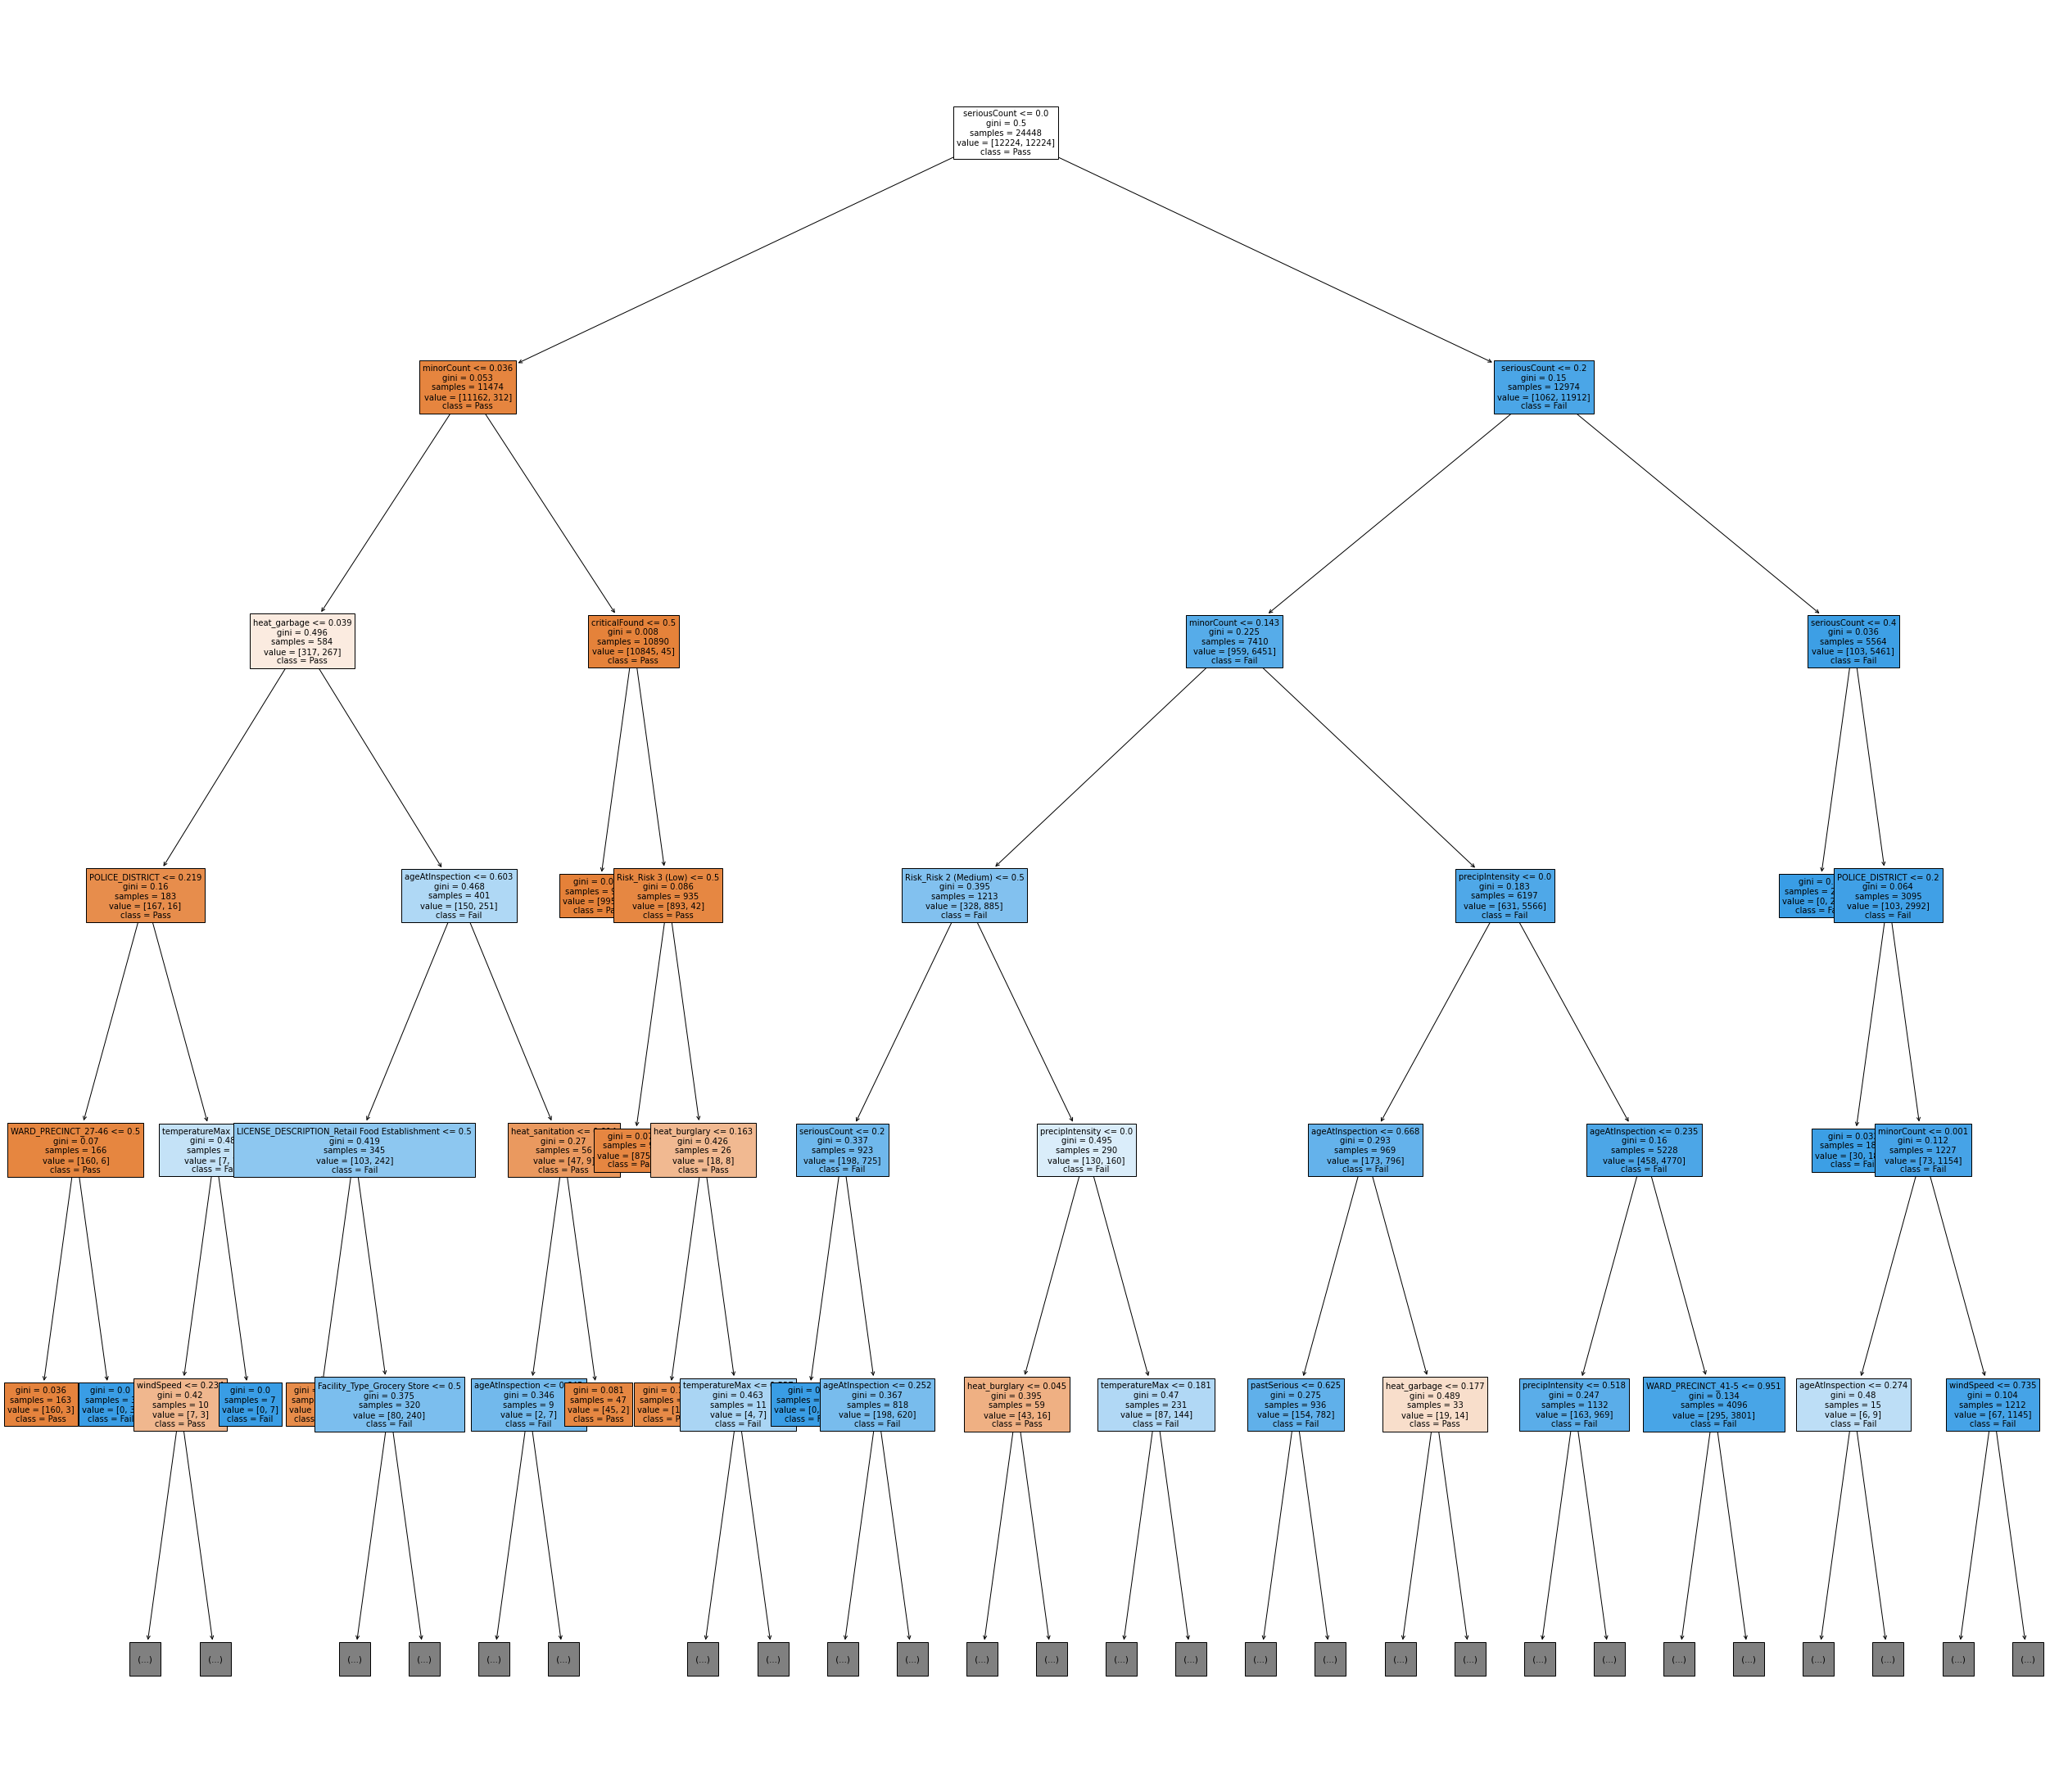

In [80]:
fig = plt.figure(figsize=(45,40))
_ = tree.plot_tree(dt_grid.best_estimator_[1], #steps[1][1], 
                   feature_names=X_reduced.columns,  
                   class_names=["Pass", "Fail"],
                   filled=True,
                  fontsize = 10,
                  max_depth = 5)

#### LDA


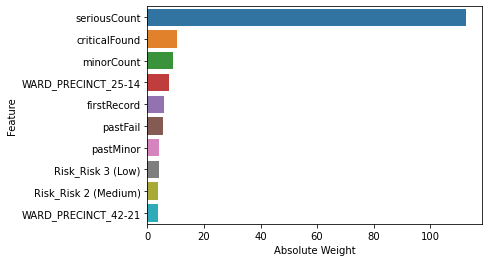

In [81]:
import seaborn as sns

lda_feat_importances = pd.concat([pd.DataFrame(X.columns), 
                                pd.DataFrame(abs(lda_grid_reg2.best_estimator_.steps[1][1].coef_.ravel()))],
                            axis = 1)
lda_feat_importances.columns = ["Feature", "Absolute Weight"]
sns.barplot(x = "Absolute Weight", y = "Feature", data = lda_feat_importances.nlargest(10, 'Absolute Weight'))
plt.show()

#### Logitsic Classification

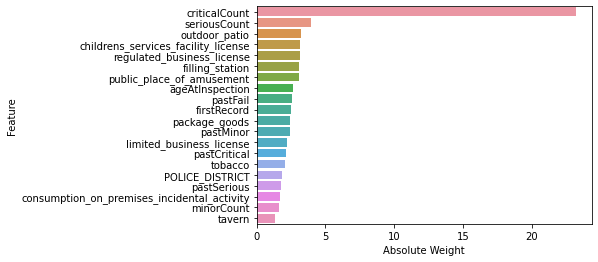

In [140]:
log_feat_importances = pd.concat([pd.DataFrame(X.columns), 
                                pd.DataFrame(abs(best.steps[1][1].coef_.ravel()))],
                            axis = 1)
log_feat_importances.columns = ["Feature", "Absolute Weight"]
sns.barplot(x = "Absolute Weight", y = "Feature", data = log_feat_importances.nlargest(20, 'Absolute Weight'))
plt.show()

# top 20 

importants = log_feat_importances.nlargest(20, 'Absolute Weight')['Feature']

## Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

In [106]:
# report the best model based on precision 
best_model = log_grid_reg4
#best_model = dt_tuned_pipe
best_model

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=10)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           solver='newton-cg'))]),
             iid=False, n_jobs=-1,
             param_grid={'logisticregression__C': array([2.  , 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09, 2.1 ]),
                         'logisticregression__solver': ['newton-cg']},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [112]:
# predict using reduced set of features 
y_pred = best_model.predict(X_reduced_log2)
y_prob = best_model.predict_proba(X_reduced_log2)[:,1]

In [113]:
# create data frame of y, y_hat and prob(y)
audit_df = pd.DataFrame({"y":y.ravel(), "y_pred":y_pred, "y_prob_fail":y_prob})

In [114]:
audit_df.head()

,y,y_pred,y_prob_fail
0,0,0,0.053434
1,0,0,0.053434
2,1,1,0.998351
3,0,0,0.330154
4,1,1,0.998351


### Performance on Predicted Riskiest Businesses

In [115]:
# sort data frame by y_prob_fail
risk_1000 = audit_df.sort_values("y_prob_fail", ascending = False, axis = 0).iloc[:1000]
risk_1000.head()

,y,y_pred,y_prob_fail
11539,1,1,1.0
8998,1,1,1.0
14654,1,1,1.0
11156,1,1,1.0
5194,1,1,1.0


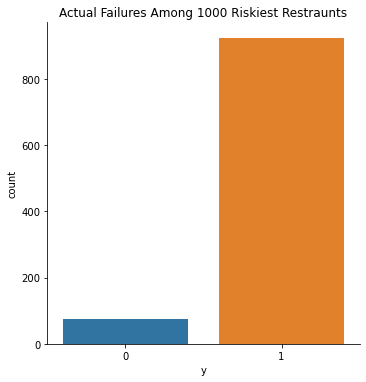

In [116]:
# plot distribution of y for riskiest 1000 establishments
sns.catplot(data = risk_1000,
           x = "y",
           kind = "count")

plt.title("Actual Failures Among 1000 Riskiest Restraunts")
plt.show()

The plot above shows the actual number of failed restraunts amongst the 1000 restraunts that our model is most likely to predict as failing. The majority of the restraunts are correctly predicted to fail, but a small fraction of the restraunts that we predict to fail, do not. This is a little concerning that, having limited to the 1000 cases that our model is **most** sure about, there are still restraunts that would be misclassified as failures by our model. That being said, the precision (calculated below) is around 93%.

In [117]:
y_1000 = risk_1000["y"].to_numpy()
y_pred_1000 = risk_1000["y_pred"].to_numpy()


TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(y_pred_1000)): 
    if y_1000[i]==y_pred_1000[i]==1:
       TP += 1
    if y_pred_1000[i]==1 and y_1000[i]!=y_pred_1000[i]:
       FP += 1
    if y_1000[i]==y_pred_1000[i]==0:
       TN += 1
    if y_pred_1000[i]==0 and y_pred_1000[i]!=y_1000[i]:
       FN += 1

In [118]:
precision = TP/(TP + FP)
precision

0.925

### Performance on Random Audit

In [119]:
# take random sample of establishments
random_sample = audit_df.sample(1000, replace = False)

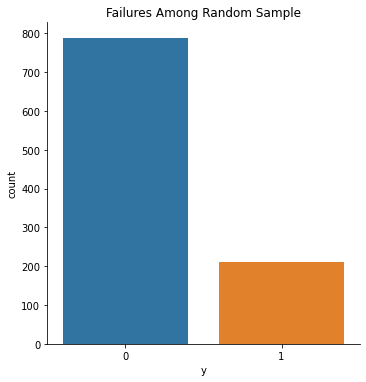

In [120]:
# show distribution of pass and failuse for the sample
sns.catplot(data = random_sample,
           x = "y",
           kind = "count")

plt.title("Failures Among Random Sample")
plt.show()

As expected, the distribution of pass and fail for the random sample of establishments looks more similar to the distribution for the entire population of establishments. Our precision for the random sample is 77%, which is worse than for the targetted sample, but similar to how our model performs overall. 

In [121]:
# calculate precision
y_1000 = random_sample["y"].to_numpy()
y_pred_1000 = random_sample["y_pred"].to_numpy()


TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(y_pred_1000)): 
    if y_1000[i]==y_pred_1000[i]==1:
       TP += 1
    if y_pred_1000[i]==1 and y_1000[i]!=y_pred_1000[i]:
       FP += 1
    if y_1000[i]==y_pred_1000[i]==0:
       TN += 1
    if y_pred_1000[i]==0 and y_pred_1000[i]!=y_1000[i]:
       FN += 1

In [122]:
precision = TP/(TP + FP)
precision

0.7689393939393939

### Predict on Data with Unseen Labels

We first preprocess the hold out data to be the same as the training data. 

In [127]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [128]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'], infer_datetime_format=True) 
chicago_inspections_2014['Inspection_MonthYear'] = chicago_inspections_2014['Inspection_Date'].dt.to_period('M')

In [129]:
# Drop datetime info
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [130]:
# All other features in X
X_test = chicago_inspections_2014
X_test = pd.get_dummies(X_test)

In [131]:
X_test = X_test.drop(columns = ['timeSinceLast', 'Facility_Type_Clean_Other', 'Facility_Type_Restaurant', 
                      'WARD_PRECINCT_29-36', 
                      'LICENSE_DESCRIPTION_Food - Shared Kitchen', 
                    'APPLICATION_TYPE_RENEW'])

In [132]:
min_max_scaler = preprocessing.MinMaxScaler()

# normalizing features 
X_test = pd.DataFrame(min_max_scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index) 


We need to make sure that the same features as we used in our final model are in the hold out data. We further limit the hold out (test) features to the most important 20 features, determined earlier when we trained the logistic regression.  

In [133]:
for i in X_reduced.columns:
    if i not in X_test.columns:
        print (i)

Facility_Type_Daycare Above and Under 2 Years
WARD_PRECINCT_24-12
WARD_PRECINCT_32-36
WARD_PRECINCT_8-23
WARD_PRECINCT_9-34
LICENSE_DESCRIPTION_Hospital


In [102]:
#for i in X_test.columns:
#    if i not in X_reduced.columns:
#        print (i)

In [136]:
# 20 features in our reduced model
importants

0                                   criticalCount
1                                    seriousCount
13                                  outdoor_patio
16            childrens_services_facility_license
18                     regulated_business_license
19                                filling_station
14                      public_place_of_amusement
9                                 ageAtInspection
3                                        pastFail
7                                     firstRecord
12                                  package_goods
6                                       pastMinor
15                       limited_business_license
4                                    pastCritical
11                                        tobacco
8                                 POLICE_DISTRICT
5                                     pastSerious
10    consumption_on_premises_incidental_activity
2                                      minorCount
17                                         tavern


In [137]:
X_test_reduced = X_test[importants]

In [138]:
y_pred = best_model.predict(X_test_reduced)

In [139]:
y_pred

array([1, 0, 1, ..., 1, 0, 0])

# Discussion Questions

**Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?**

Accuracy is a broad metric, in that it aggregates overall correct predictions regardless of the class being predicted. In this binary (or rather, binarized) case of failing vs. passing inspections, accuracy would be an overall evaluation of a model's ability to predict an observation into either class. While this can be useful as a starting point, often in social science and public policy, the target classes are of distinct theoretical and practical significance. That is, social scientists and policymakers may have justifications for correctly predicting one class at the expense of predicting another, for casting a non-conservative net to capture many of one class, etc. Because accuracy as a measure is agnostic to these class distinctions, other metrics may be useful as a substitution or supplement. Examples of classes that are important could be gender, race, sexual orientation -- and accuracy does not provide sufficient information about how the model performs for these groups. 

The main metric we used in this project was precision: a measure of the proportion of *correct* predictions of the positive target class (in this case, failed inspections), or in other words, the proportion of predicted failed inspections that were *actually* failed inspections, and not false positives. Practically, this was because one task at hand was to generate a list of 1000 riskiest establishments to recommend for audit. Since there are around 9000 unique establishments in the dataset, it was better to have precise predictions (since we will only audit a small portion of establishments) rather than overall accurate or exhaustive ones. Indeed, prioritizing precision often means that the predictions are more conservative.

By contrast, if we were to seek an exhaustive list that correctly identified most of the establishments that would fail, we would prioritize recall—a measure of the proportion of the *actually* positive cases that were accurately *predicted*. Similarly, recall is optimized at the expense of precision—a less conservative net will be able to capture more of the positive class, but may also capture many of the negative class as well. 

If we were interested in the benefits of both of these metrics, F1 score is a metric that attempts to balance these competing priorities. 

**Imagine that establishments learned about the algo- rithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were im- portant for the prediction) to avoid detection. How could policymakers address this interplay between al- gorithmic decisionmaking and real world behavior?**

The working paper we read by Ash, Galletta, and Giommoni on using machine learning to target anti-corruption audits has some useful insights for this question. First, the authors consider the question of whether the technical details of the model and the model weights associated with particular features should be publicized. Assuming that the state can choose whether or not these details can be made public, the authors posit that giving full information on the model “increase deterrence against corruption (in our case, poor food safety practices) actions that are not easily substitutable” (27). In our chosen model, that means that the temperature or whether they have an outdoor area may be gamified because they are easily manipulated, but location and former violations will be difficult to change by behavioral responses of the firms in question. On the other hand, if the state does not give any details on the models, the authors suggest that establishments could learn over time how to game the prediction, but that this would occur slowly. 

All three models point to the most important features for prediction being the number of violation counts an establishment has received. “Gaming” the algorithm would therefore mean an establishment reducing the number of violations it receives. If we assume that violations are a good mapping of actual problems with the restraunts (as opposed to, say, arbitrary decisions by inspectors or discrimination against certain restraunt characteristics, for instance, the restraunt being in a poorer neighborhood), then reducing the number of violations received is a good thing for everyone (the restauraunts and the auditors) and the state should not be concerned about the algorithm being gamed. Establishments could also game the algorithm by bribing city officials to give them less violations -- so policymakers should make sure that their inspectors are well-compensated and do not have previous histories of accepting bribes. 

The other suggestion is that a mixture of predicted targeting and random audits are instituted, rather than just the predicted audits. While the targeted audits from the model would keep the high-risk (at least, as defined by the model) establishments under surveillance, the randomness of the audits will also have some increase in deterrence for all establishments. Additionally, the collected data from the randomly audited sample could be used to update algorithm parameters for the subsequent period of targeted audits. 
